# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import read_data
import os

# Parsing files

In [2]:
result_files = [f for f in os.listdir("../../../energy_dataset/") if f.endswith("results")]
data_df = pd.DataFrame()

for file in result_files:
    file_df = read_data.read_bb_data(f"../../../energy_dataset/{file}/breaker_code.txt", f"../../../energy_dataset/{file}/breaker_final_energy.txt")
    file_df = file_df.drop(columns=["bb_name"])
    data_df = pd.concat([data_df, file_df], ignore_index=True)

Read file: 5500it [00:00, 1571756.63it/s]
Read file: 1007it [00:00, 671275.29it/s]
Read file: 23761it [00:00, 1485214.41it/s]
Read file: 3281it [00:00, 656278.86it/s]
Read file: 65377it [00:00, 1037746.46it/s]
Read file: 10955it [00:00, 952835.79it/s]
Read file: 7827it [00:00, 1565886.83it/s]
Read file: 1281it [00:00, 855013.28it/s]
Read file: 307469it [00:00, 1652799.71it/s]
Read file: 55158it [00:00, 984997.94it/s]
Read file: 32428it [00:00, 1704080.51it/s]
Read file: 3856it [00:00, 858224.26it/s]
Read file: 45306it [00:00, 642619.68it/s]
Read file: 6559it [00:00, 874652.34it/s]
Read file: 45309it [00:00, 1394132.08it/s]
Read file: 6560it [00:00, 874924.77it/s]
Read file: 96857it [00:00, 1562058.59it/s]
Read file: 15598it [00:00, 917235.70it/s]
Read file: 112856it [00:00, 1623159.86it/s]
Read file: 17381it [00:00, 893079.64it/s]
Read file: 37263it [00:00, 1619811.27it/s]
Read file: 6354it [00:00, 906699.13it/s]
Read file: 43378it [00:00, 1577427.77it/s]
Read file: 7697it [00:00, 9055

In [3]:
print(f"Number of basic blocks: {len(data_df)}")

Number of basic blocks: 138313


In [4]:
data_df.head(5)

,bb,energy
0,"[movl $0x0, -0x2c(%rbp)]",0.645165
1,"[callq 0xfffffffffffffeff, pushq %rbp, mov %...",2.910575
2,"[popq %rbp, retq]",0.997157
3,"[movl $0x0, -0x1c(%rbp)]",0.664772
4,"[cmpl $0x64, -0x1c(%rbp), jnl 0x2c]",1.400952


# Analysis

Distribution based on number of instructions

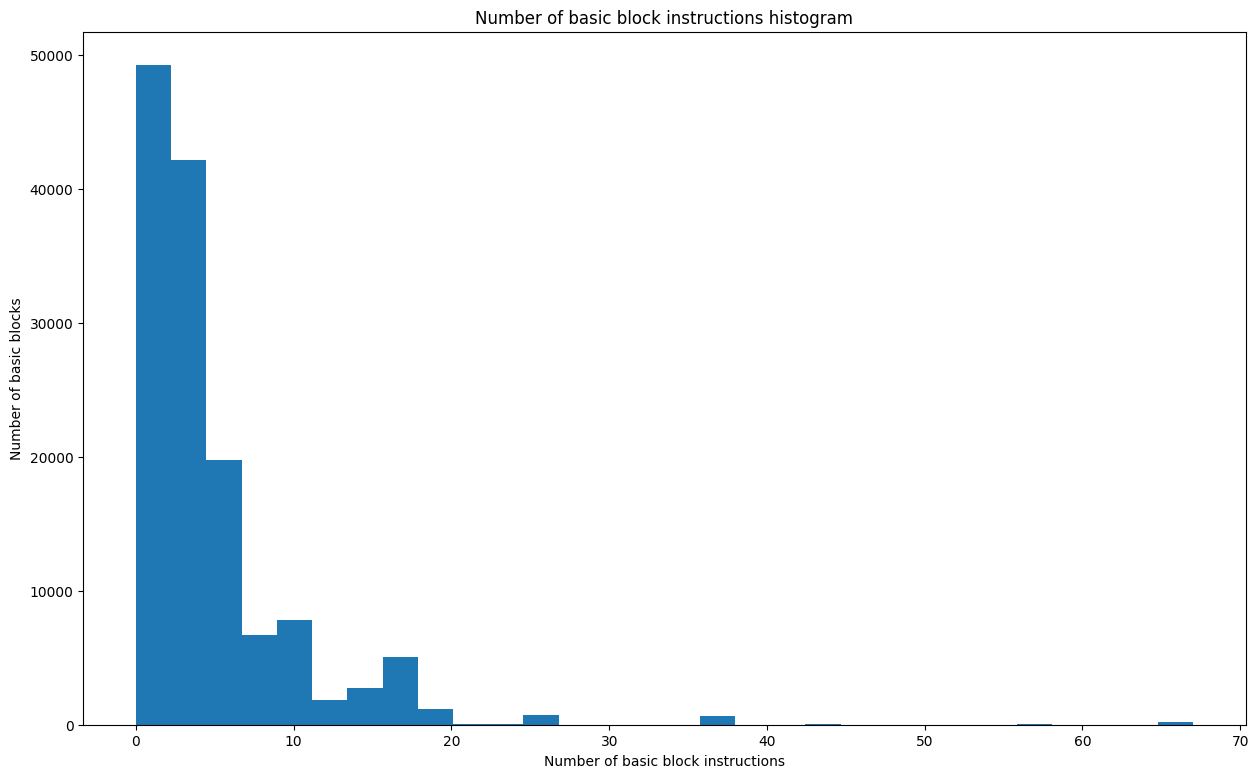

In [5]:
bb_instruction_num = data_df.bb.apply(lambda x: len(x)).values

plt.figure(figsize=(15,9))
plt.title("Number of basic block instructions histogram")
plt.xlabel("Number of basic block instructions")
plt.ylabel("Number of basic blocks")
plt.hist(bb_instruction_num, bins = 30)
plt.show()

In [6]:
MAX_INSTRUCTIONS = 20

data_df = data_df[data_df.bb.apply(lambda x: len(x)) <= MAX_INSTRUCTIONS]
data_df = data_df.reset_index(drop=True)
print(f"Number of data with bb up to {MAX_INSTRUCTIONS} instructions: {len(data_df)}")

Number of data with bb up to 20 instructions: 136470


Energy distribution

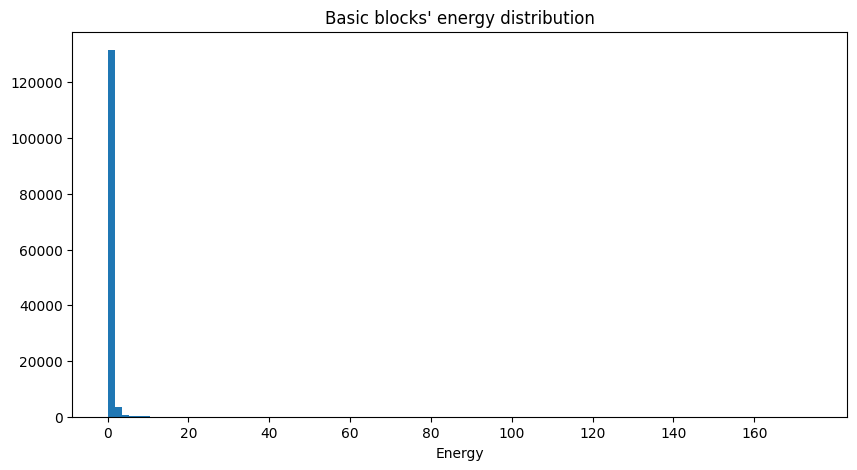

In [7]:
x_ticks = np.arange(data_df.energy.min(), data_df.energy.max(), 20)

plt.figure(figsize=(10, 5))
plt.hist(data_df.energy, bins=100)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()

In [8]:
outlier_bb = data_df.loc[data_df.energy.idxmax()]
outlier_bb.bb

['imull  $0x3, -0xc(%rbp), %eax',
 'cdq',
 'mov $0x5, %ecx',
 'idiv %ecx',
 'movsxdl  -0xc(%rbp), %rdx',
 'movl  %eax, -0x4d0(%rbp,%rdx,4)',
 'movsxdl  -0xc(%rbp), %rax',
 'movl  -0x4d0(%rbp,%rax,4), %eax',
 'cdq',
 'idiv %ecx',
 'cmp $0x2, %edx',
 'jle 0x20']

We remove the outliers and data with 0 energy

In [9]:
perc = len(data_df[data_df.energy < 10]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 10: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 5]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 5: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 2]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 2: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 1]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 1: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 0.5]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 0.5: {round(perc, 2)}%")

perc = len(data_df[data_df.energy == 0.0]) * 100/ len(data_df)
print(f"Percentage of basic blocks with 0 energy: {round(perc, 2)}%")

Percentage of basic blocks with energy lower than 10: 99.76%
Percentage of basic blocks with energy lower than 5: 99.29%
Percentage of basic blocks with energy lower than 2: 97.0%
Percentage of basic blocks with energy lower than 1: 93.08%
Percentage of basic blocks with energy lower than 0.5: 83.1%
Percentage of basic blocks with 0 energy: 1.53%


In [10]:
data_df = data_df[data_df.energy > 0.0]
data_df = data_df[data_df.energy < 10.0]

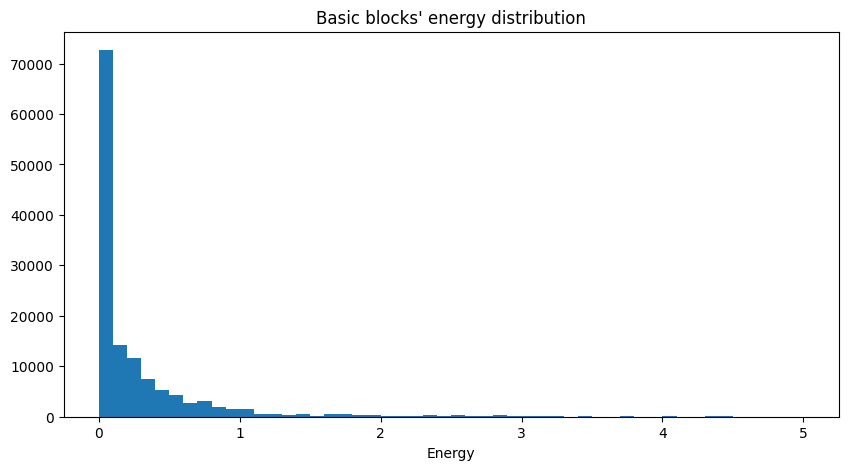

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(data_df.energy, range=(0, 5), bins=50)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.show()

In [12]:
grouped_df = data_df.groupby(data_df["bb"].map(tuple))["energy"].apply(list).reset_index()
grouped_df.head(5)

,bb,energy
0,"(add $0x1, %esi, movl %esi, (%rax), cmpl %es...","[0.5424012176039207, 0.7992710202680604, 0.802..."
1,"(add $0x1, %r15, movq 0x28(%r12), %rax, movzx...","[0.5917109886658334, 0.5917109886658334, 0.591..."
2,"(add $0x1, %r9d, cmpq $0x0, -0x500(%rbp), jz ...","[0.20175424949920964, 0.20175424949920964, 0.2..."
3,"(add $0x10, %rsp, popq %rbx, popq %r14, popq...","[0.31704255766363015, 0.5424012176039207, 0.54..."
4,"(add $0x17, %r15, mov %rsp, %rdx, mov %r15, %r...","[0.5424012176039207, 0.7992710202680604, 0.802..."


In [17]:
multiple_energies_df = grouped_df[grouped_df.energy.map(len) > 1]
perc = len(multiple_energies_df) * 100 / len(grouped_df)
print(f"Number of basic blocks that appear multiple times: {round(perc, 2)}%")

Number of basic blocks that appear multiple times: 66.48%


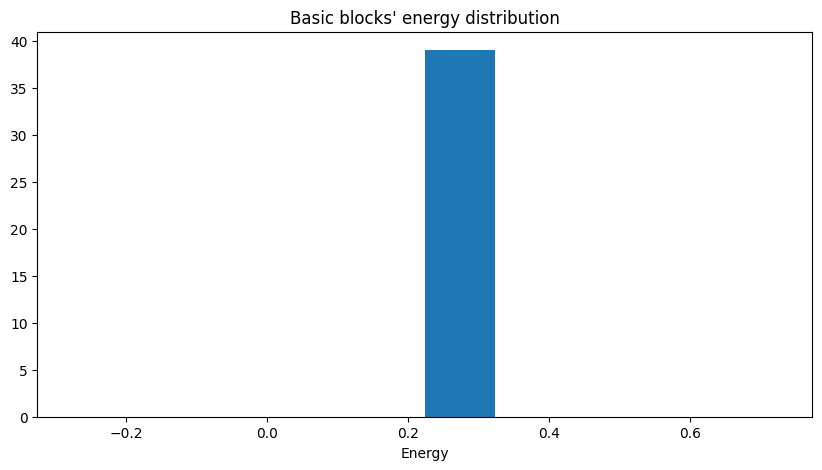

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(grouped_df[grouped_df.energy.map(len) > 10].sample(1).energy)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.show()

# Energy distribution per program

Read file: 5500it [00:00, 1377892.25it/s]
Read file: 1007it [00:00, 671916.02it/s]


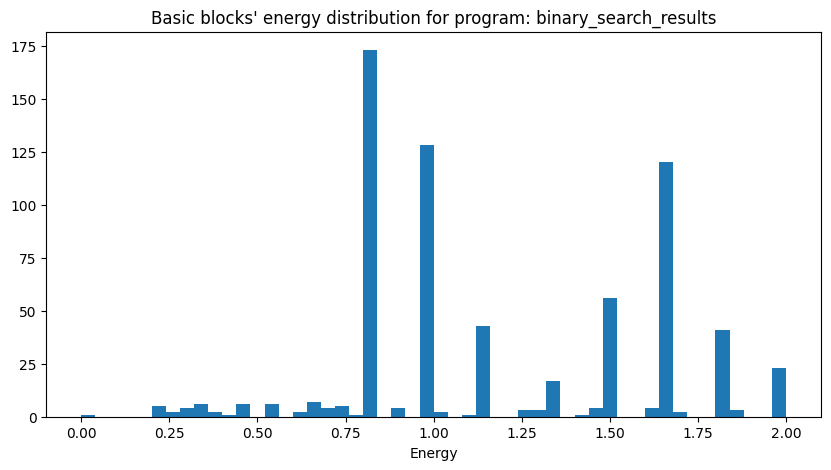

Read file: 23761it [00:00, 1584282.22it/s]
Read file: 3281it [00:00, 821337.60it/s]


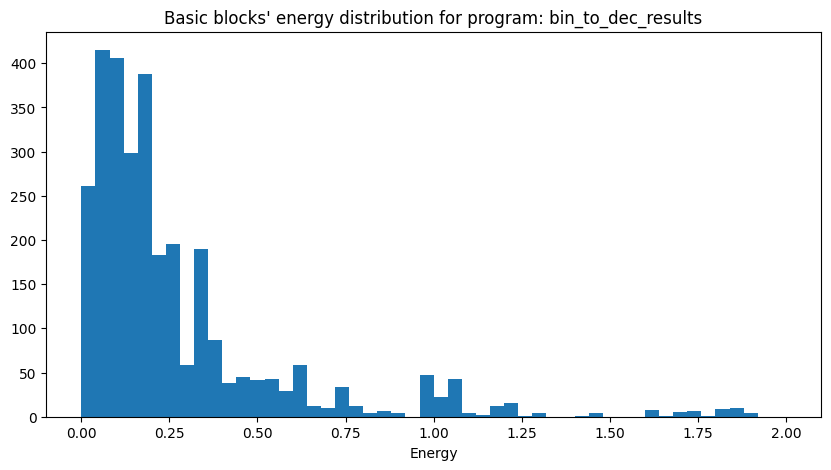

Read file: 65377it [00:00, 1520421.25it/s]
Read file: 10955it [00:00, 908865.42it/s]


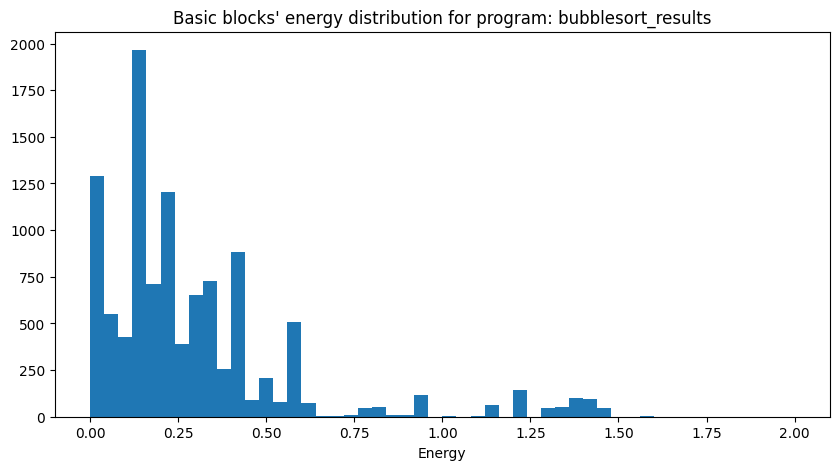

Read file: 7827it [00:00, 1305165.09it/s]
Read file: 1281it [00:00, 855149.36it/s]


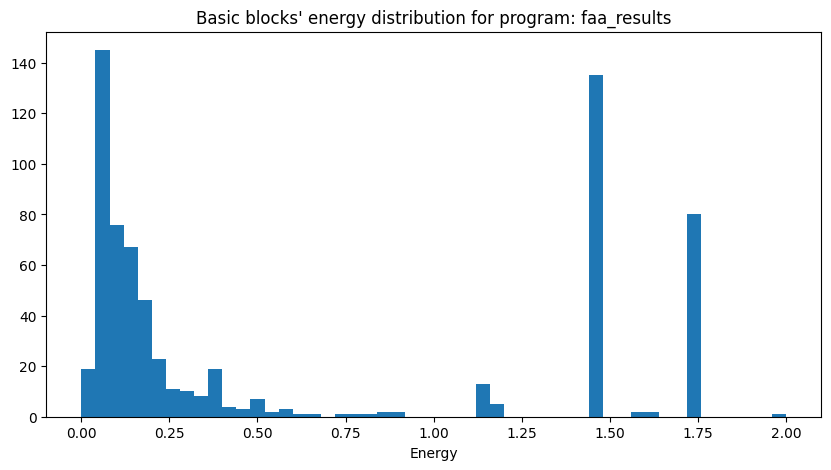

Read file: 307469it [00:00, 1378551.58it/s]
Read file: 55158it [00:00, 919337.41it/s]


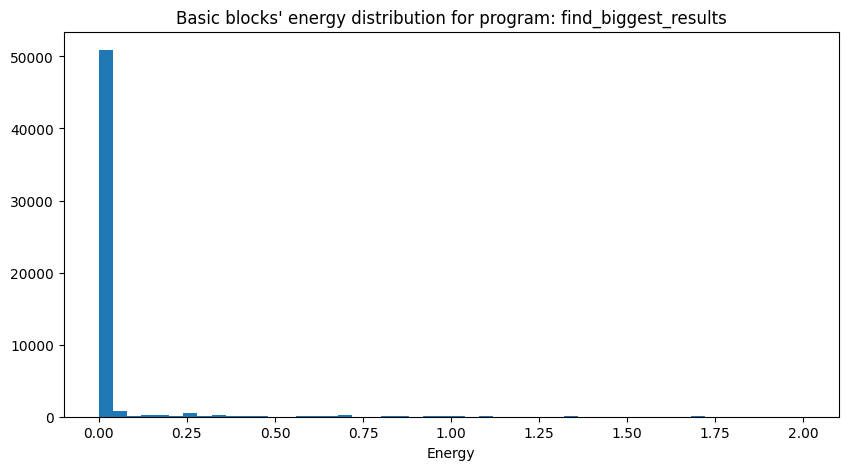

Read file: 32428it [00:00, 1620744.64it/s]
Read file: 3856it [00:00, 855953.23it/s]


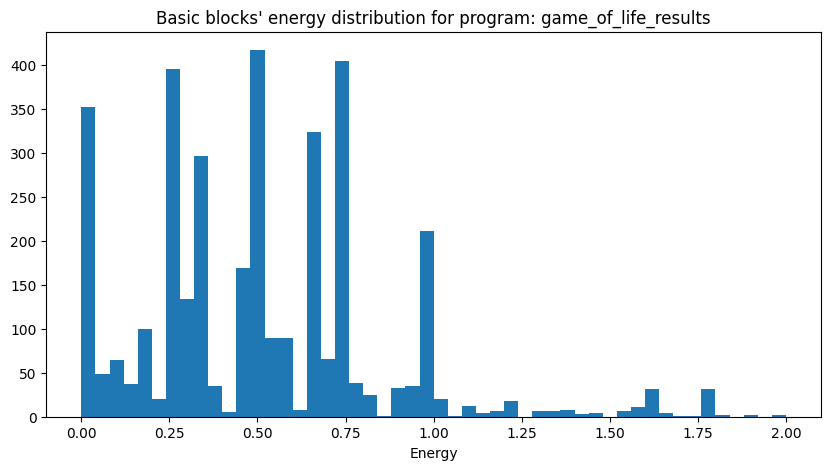

Read file: 45306it [00:00, 1562312.03it/s]
Read file: 6559it [00:00, 874541.12it/s]


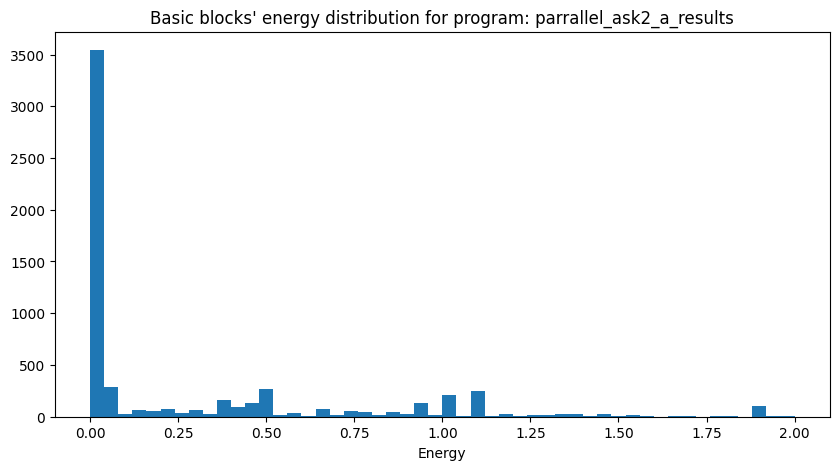

Read file: 45309it [00:00, 1562017.38it/s]
Read file: 6560it [00:00, 874841.32it/s]


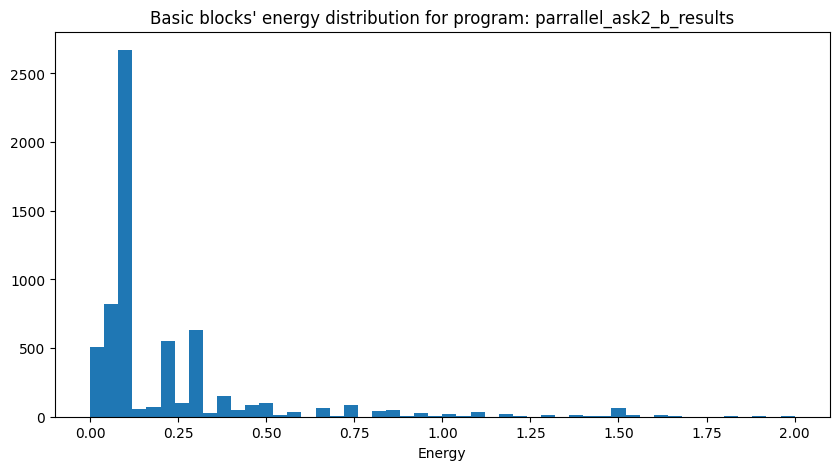

Read file: 96857it [00:00, 1019611.03it/s]
Read file: 15598it [00:00, 917518.71it/s]


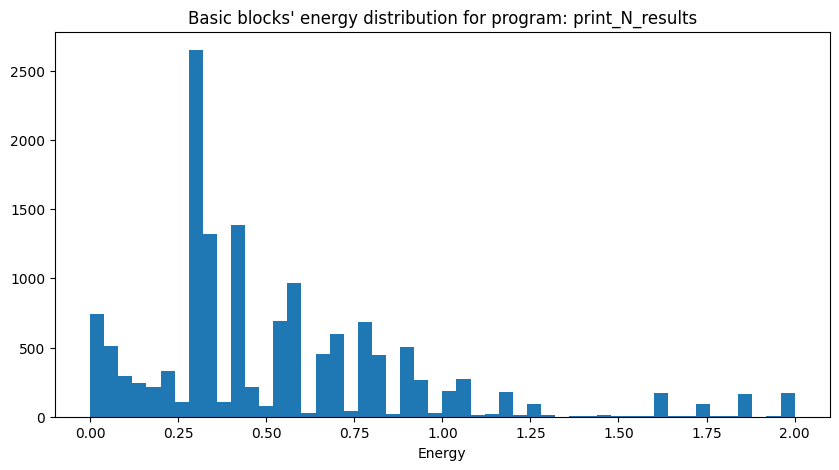

Read file: 112856it [00:00, 1589406.82it/s]
Read file: 17381it [00:00, 827510.56it/s]


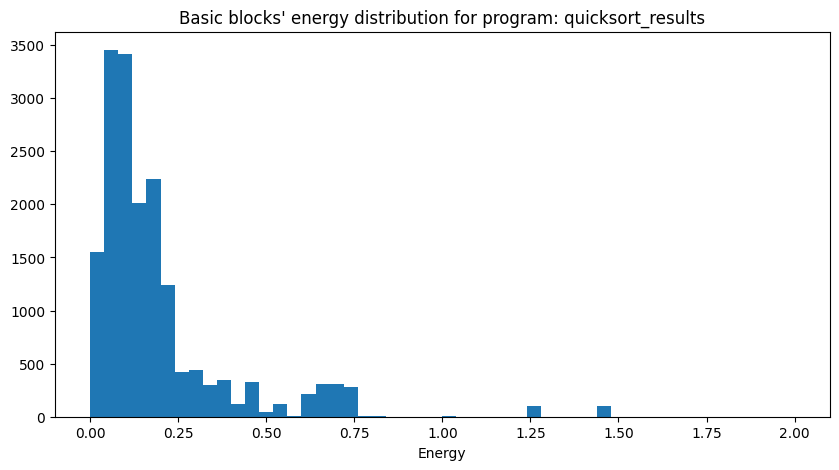

Read file: 37263it [00:00, 1617966.73it/s]
Read file: 6354it [00:00, 794165.55it/s]


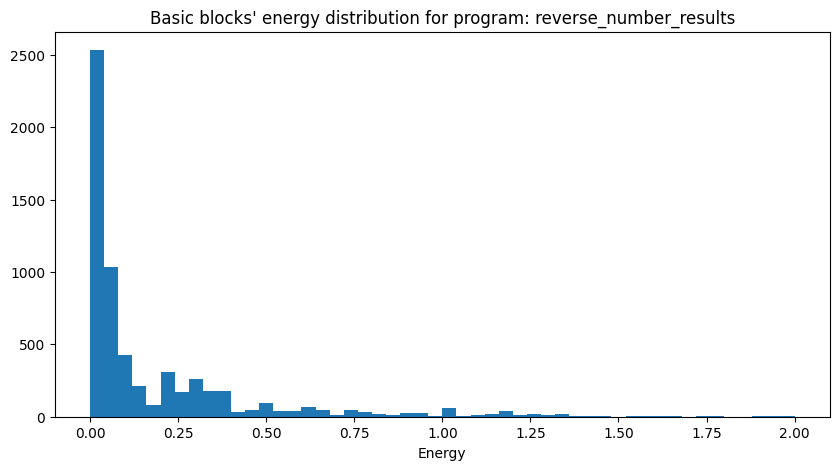

Read file: 43378it [00:00, 1548825.39it/s]
Read file: 7697it [00:00, 904732.17it/s]


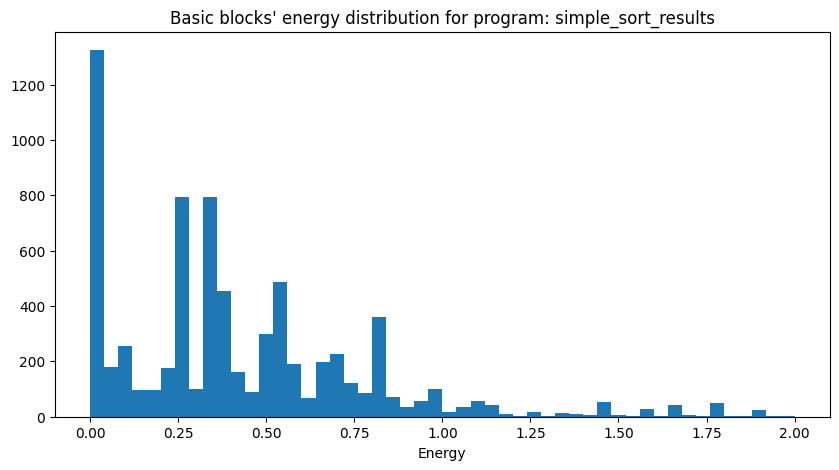

Read file: 15556it [00:00, 1554897.12it/s]
Read file: 2626it [00:00, 747234.89it/s]


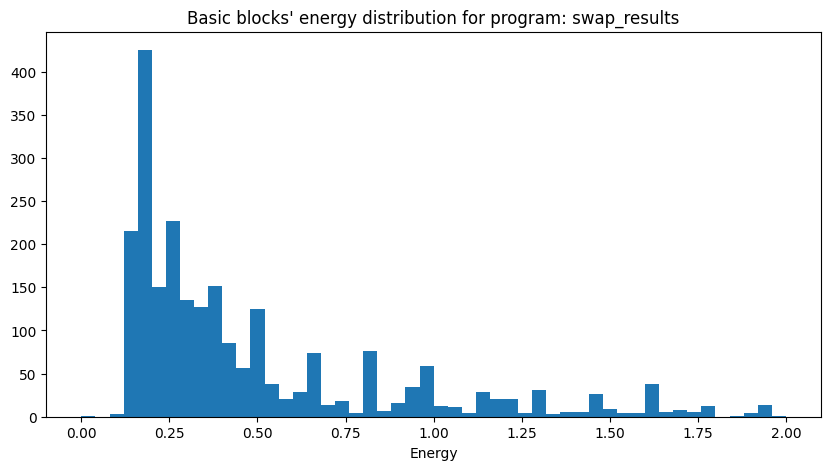

In [2]:
result_files = [f for f in os.listdir("../../../energy_dataset/") if f.endswith("results")]

for file in result_files:
    file_df = read_data.read_bb_data(f"../../../energy_dataset/{file}/breaker_code.txt", f"../../../energy_dataset/{file}/breaker_final_energy.txt")
    plt.figure(figsize=(10, 5))
    plt.hist(file_df.energy, range=(0, 2), bins=50)
    plt.title(f"Basic blocks' energy distribution for program: {file}")
    plt.xlabel("Energy")
    plt.show()